# 1. Makeover

In [70]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")

duckdb.query(
    """--sql
    SELECT
        avg_CO2, 
        import, 
        quantity, 
        year, 
        month
    FROM 
        df
    """
).df()

,Avg_CO2,Import,Quantity,Year,Month
0,152,2276,12685,2007,1
1,156,1992,9793,2007,2
2,159,2626,11264,2007,3
3,160,2220,8854,2007,4
4,160,2881,12007,2007,5
...,...,...,...,...,...
116,88,1526,13854,2016,9
117,91,1365,11932,2016,10
118,88,1305,13194,2016,11
119,98,1137,13602,2016,12


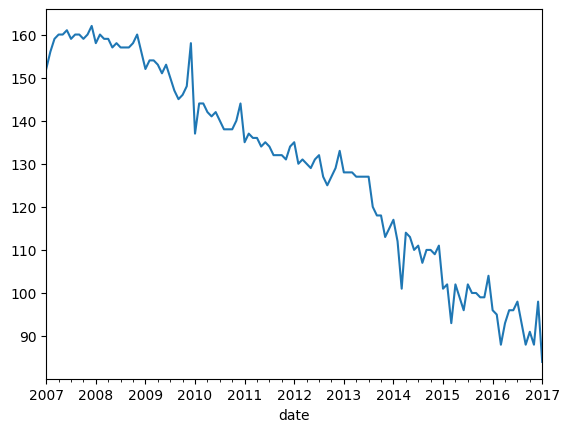

In [71]:
df["date"] = pd.to_datetime(
    df["Year"].astype(str) + '-' + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

ax = df["Avg_CO2"].plot()


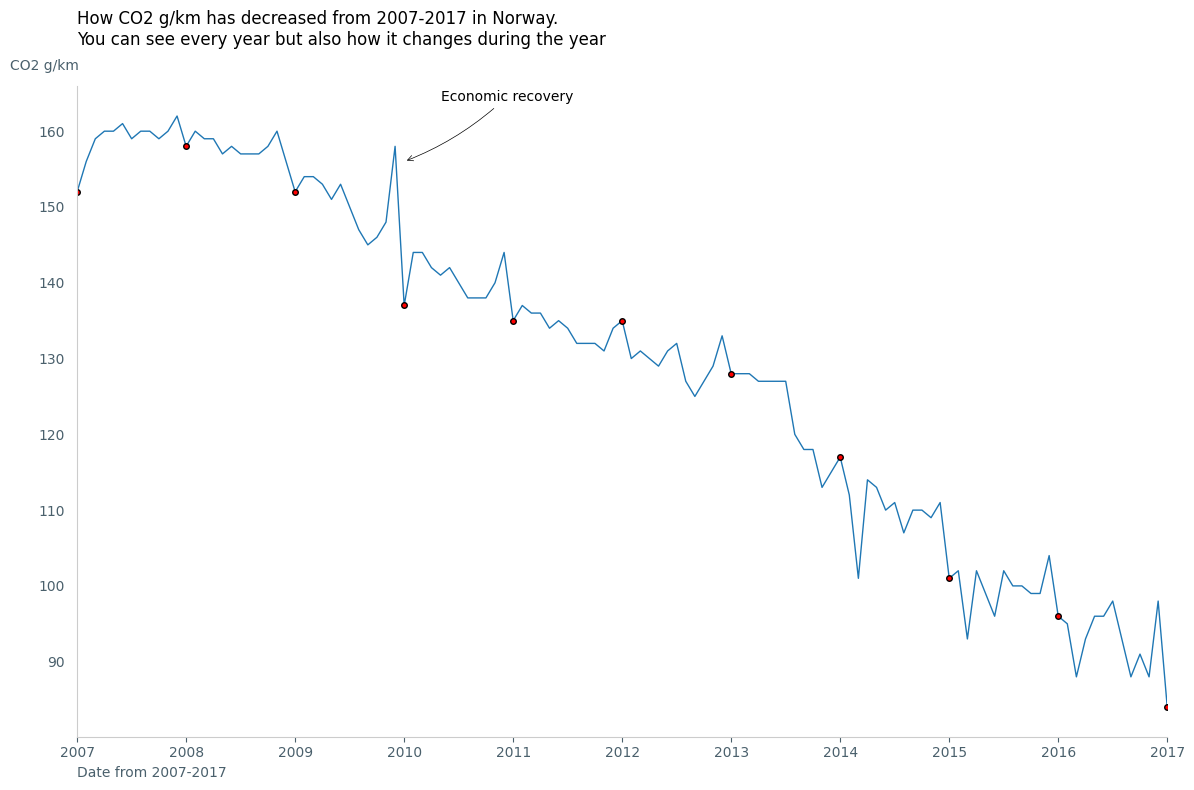

In [135]:
import matplotlib.pyplot as plt
from constant import GRAY_1, GRAY_2, GRAY_3, BLUE_1


ax = df["Avg_CO2"].plot(figsize=(12,8), linestyle= "-", linewidth= 1)

# Make a graph to mark only the year
january_df = df[df.index.month == 1] # using pandas to fillter month to January   
january_df.plot(
    y="Avg_CO2",
    ax=ax,
    linestyle= "None",  # none because using from first plot
    marker= "o",         
    markerfacecolor= "red",
    markeredgecolor= "black",
    markersize= 4,
    color= "blue"            # line color
)

# clutter
ax.spines[["top", "right"]].set_visible(False)      # remove right and top line on the graph. The line that frame the graph calls spine 

# contrast
ax.tick_params(axis= "y",length= 0, pad= 9)         # take away the major tick on y-axel
ax.minorticks_off()                                 # take away all the minortick 
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="x", color= GRAY_3)



# description title and label - call To action (CTA)
ax.set_title("How CO2 g/km has decreased from 2007-2017 in Norway. \nYou can see every year but also how it changes during the year", 
             loc= "left", 
             pad= 30)                             # moving the label away from graph
ax.set_ylabel("CO2 g/km", rotation= 0, color= GRAY_3)
ax.yaxis.set_label_coords(-0.03,1.02)
ax.set_xlabel("Date from 2007-2017", loc= "left", color= GRAY_3)
ax.tick_params(axis="both", labelcolor= GRAY_3)

row = df.loc["2010-01-01"]
x = row.name
y = row["Avg_CO2"]

ax.annotate(text= "Economic recovery", 
            xy=(x ,y + 19), 
            xytext= (x + pd.Timedelta(days=150), y +27),   # använda pd.Timedelta för date date format (sträng) det gåt inte använda operationer på sträng
            arrowprops=dict(arrowstyle= "->", 
            linewidth= 0.5, 
            connectionstyle= "arc3, rad=-0.1"))


ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/co2_norway.png")
plt.show()
